# **TASK 1**

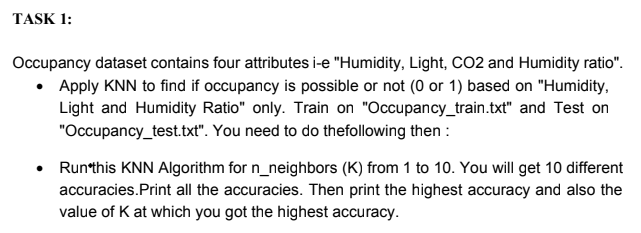

In [ ]:
# @title TASK 1 -- Loading Files
import numpy as np
import pandas as pd
occupancy_train=pd.read_csv('occupancy_training.txt')
occupancy_test=pd.read_csv('occupancy_testing.txt')

In [ ]:
# @title TASK 1 -- EDA
occupancy_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [ ]:
occupancy_test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [ ]:
# @title TASK 1 -- Dropping Unnecessary Columns
X_train=occupancy_train.drop(['Occupancy','date'],axis=1)
y_train=occupancy_train['Occupancy']
X_test=occupancy_test.drop(['Occupancy','date'],axis=1)
y_test=occupancy_test['Occupancy']

In [ ]:
# @title TASK 1 -- Balancing Data
from collections import Counter
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
xdata, ydata=smk.fit_resample(X_train,y_train)
print(f"Original Dataset Shape: {Counter(y_train)}")
print(f'Resampled Dataset Shape:  {Counter(ydata)}')

Original Dataset Shape: Counter({0: 6414, 1: 1729})
Resampled Dataset Shape:  Counter({1: 6404, 0: 6404})


In [ ]:
smk = SMOTETomek(random_state=42)
xdata1,ydata1=smk.fit_resample(X_test,y_test)
X_test.shape, y_test.shape
print(f"Original Dataset Shape: {Counter(y_test)}")
print(f'Resampled Dataset Shape:  {Counter(ydata1)}')

Original Dataset Shape: Counter({0: 1693, 1: 972})
Resampled Dataset Shape:  Counter({1: 1680, 0: 1680})


In [ ]:
# @title TASK 1 -- Dropping Columns not needed for KNN
X_train=xdata.drop(['CO2','Temperature'],axis=1)
X_test=xdata1.drop(['CO2','Temperature'],axis=1)

In [ ]:
Y_train=ydata
Y_test=ydata1

In [ ]:
# @title TASK 1 -- Checking for Missing Values
for var in X_test.columns:
    print(X_test[var].value_counts())

Humidity
22.500000    93
25.000000    83
22.290000    63
22.200000    62
24.500000    51
             ..
25.197500     1
25.272000     1
25.373333     1
25.228333     1
28.224569     1
Name: count, Length: 1359, dtype: int64
Light
0.000000      1615
433.000000     131
419.000000     105
444.000000      71
454.000000      61
              ... 
740.500000       1
754.000000       1
763.000000       1
755.500000       1
559.329957       1
Name: count, Length: 940, dtype: int64
HumidityRatio
0.003327    67
0.003695    45
0.003325    40
0.003710    36
0.003336    32
            ..
0.004479     1
0.004471     1
0.004483     1
0.004492     1
0.004616     1
Name: count, Length: 2158, dtype: int64


In [ ]:
X_train.isnull().sum()

,0
Humidity,0
Light,0
HumidityRatio,0


In [ ]:
X_test.isnull().sum()

,0
Humidity,0
Light,0
HumidityRatio,0


In [ ]:
# @title TASK 1 -- Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)

In [ ]:
X_test = pd.DataFrame(X_test)

In [ ]:
# @title TASK 1 -- KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acclist=[]
nlist=[]
for i in range(1,11):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  y_pred=knn.predict(X_test)
  acc=accuracy_score(Y_test,y_pred)
  acclist.append(acc)
  nlist.append(i)
print("Accuracies: ",acclist)
max_idx=acclist.index(max(acclist))
print("Best Accuracy: ",max(acclist))
print("Best K: ",nlist[max_idx])

Accuracies:  [0.9508928571428571, 0.9398809523809524, 0.955952380952381, 0.9514880952380952, 0.9598214285714286, 0.9589285714285715, 0.9607142857142857, 0.9589285714285715, 0.9607142857142857, 0.9607142857142857]
Best Accuracy:  0.9607142857142857
Best K:  7


# **TASK 2**

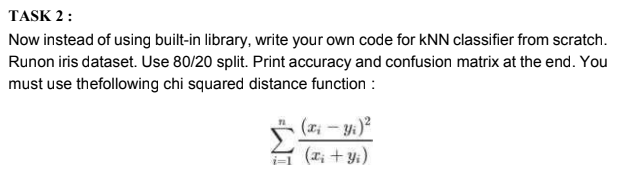

In [ ]:
# @title TASK 2 -- Importing Libraries
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# @title TASK 2 -- Loading Dataset
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
# @title TASK 2 -- Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# @title TASK 2 -- KNN, Accuracy, and Confusion Matrix
k=3
pred=[]
for xi in X_test:
    dist=[]
    for yi in X_train:
        d=np.sum((xi-yi)**2/(xi+yi))
        dist.append(d)
    sort=np.argsort(dist)
    nearest=sort[:k]
    label=[y_train[i] for i in nearest]
    pred.append(max(set(label),key=label.count))
acc=accuracy_score(y_test,pred)
print("Accuracy:\n",acc)
cm=confusion_matrix(y_test, pred)
print("\nConfusion Matrix:")
print(cm)

Accuracy:
 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# **TASK 3**

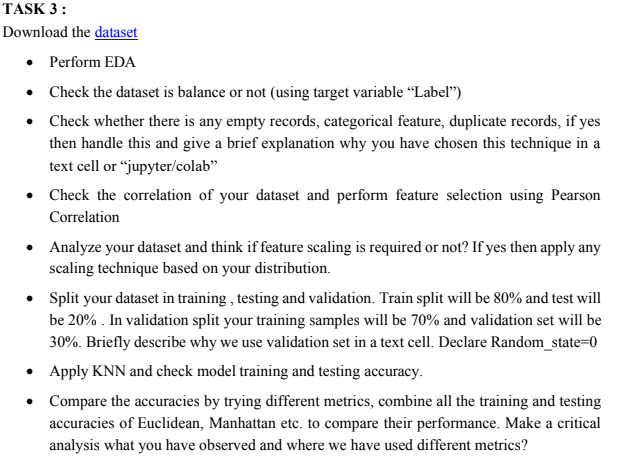

In [ ]:
# @title Loading the Dataset
import pandas as pd
cancer=pd.read_csv('cancer patient data sets.csv')
cancer

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
# @title Performing EDA
cancer.head(5)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
cancer.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


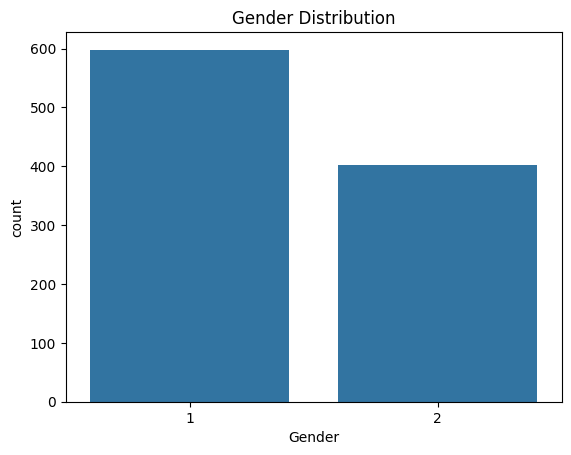

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Gender', data=cancer)
plt.title("Gender Distribution")
plt.show()

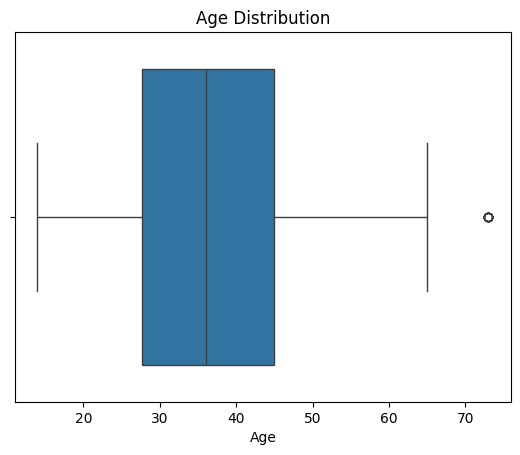

In [ ]:
sns.boxplot(x='Age', data=cancer)
plt.title("Age Distribution")
plt.show()

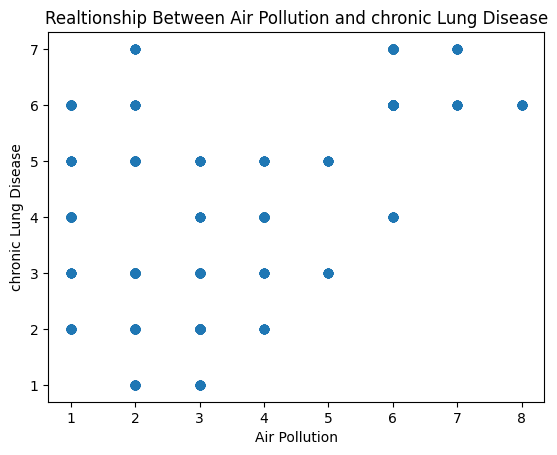

In [ ]:
plt.scatter(cancer['Air Pollution'], cancer['chronic Lung Disease'])
plt.xlabel('Air Pollution')
plt.ylabel('chronic Lung Disease')
plt.title('Realtionship Between Air Pollution and chronic Lung Disease')
plt.show()

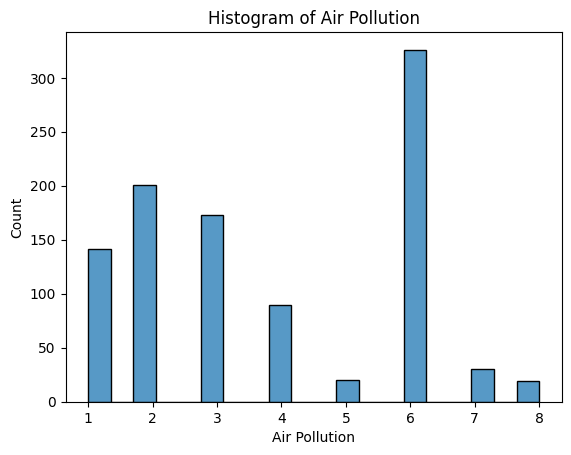

In [ ]:
sns.histplot(cancer['Air Pollution'], bins=20)
plt.title('Histogram of Air Pollution')
plt.show()

Text(0, 0.5, 'Weight Loss')

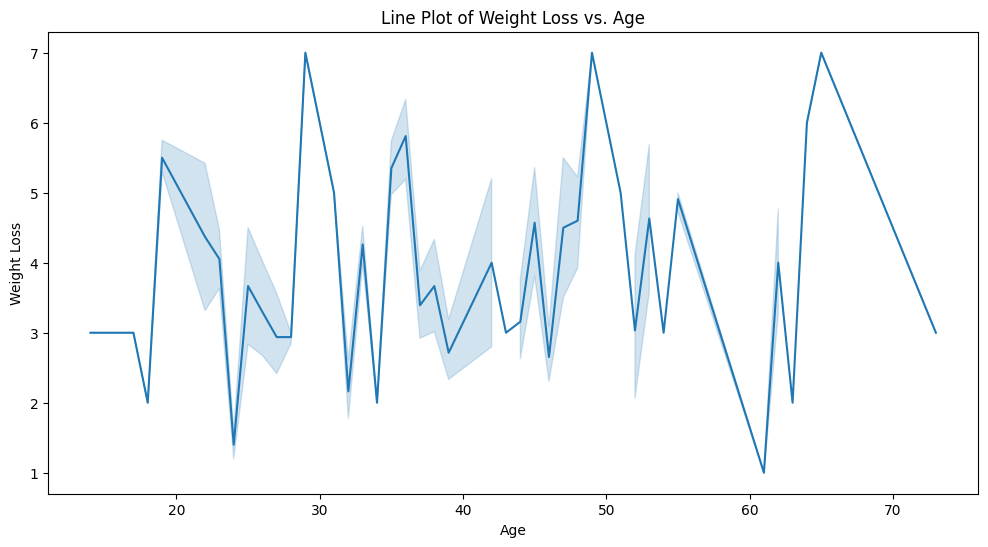

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=cancer, x='Age', y='Weight Loss')
plt.title('Line Plot of Weight Loss vs. Age')
plt.xlabel('Age')
plt.ylabel('Weight Loss')

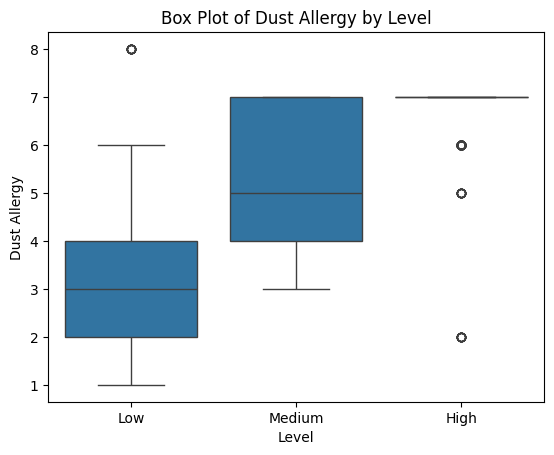

In [ ]:
sns.boxplot(data=cancer, x='Level', y='Dust Allergy')
plt.title('Box Plot of Dust Allergy by Level')
plt.xlabel('Level')
plt.ylabel('Dust Allergy')
plt.show()


In [ ]:
# @title TASK 3 -- Checking Balance
cancer['Level'].value_counts()


,count
Level,
High,365
Medium,332
Low,303


The dataset is balanced because the counts for each class are not drastically different.

In [ ]:
# @title TASK 3 -- Checking for Null and Duplicated Values
print(cancer.isnull().sum())
print("\nNo. of Duplicated Rows: ",cancer.duplicated().sum())

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

No. of Duplicated Rows:  0


No Null Values and No Duplicates

In [ ]:
# @title TASK 3 -- Turning Target Variable 'Level' into Numeric Data
cancer['Level']=cancer['Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [ ]:
# @title TASK 3 -- Dropping Unnecessary Columns
cancer.drop('Patient Id', axis=1, inplace=True)

In [ ]:
cancer.drop('index', axis=1, inplace=True)

In [ ]:
# @title TASK 3 -- Correlation Matrix
xcancer=cancer.drop('Level',axis=1)
ycancer=cancer['Level']

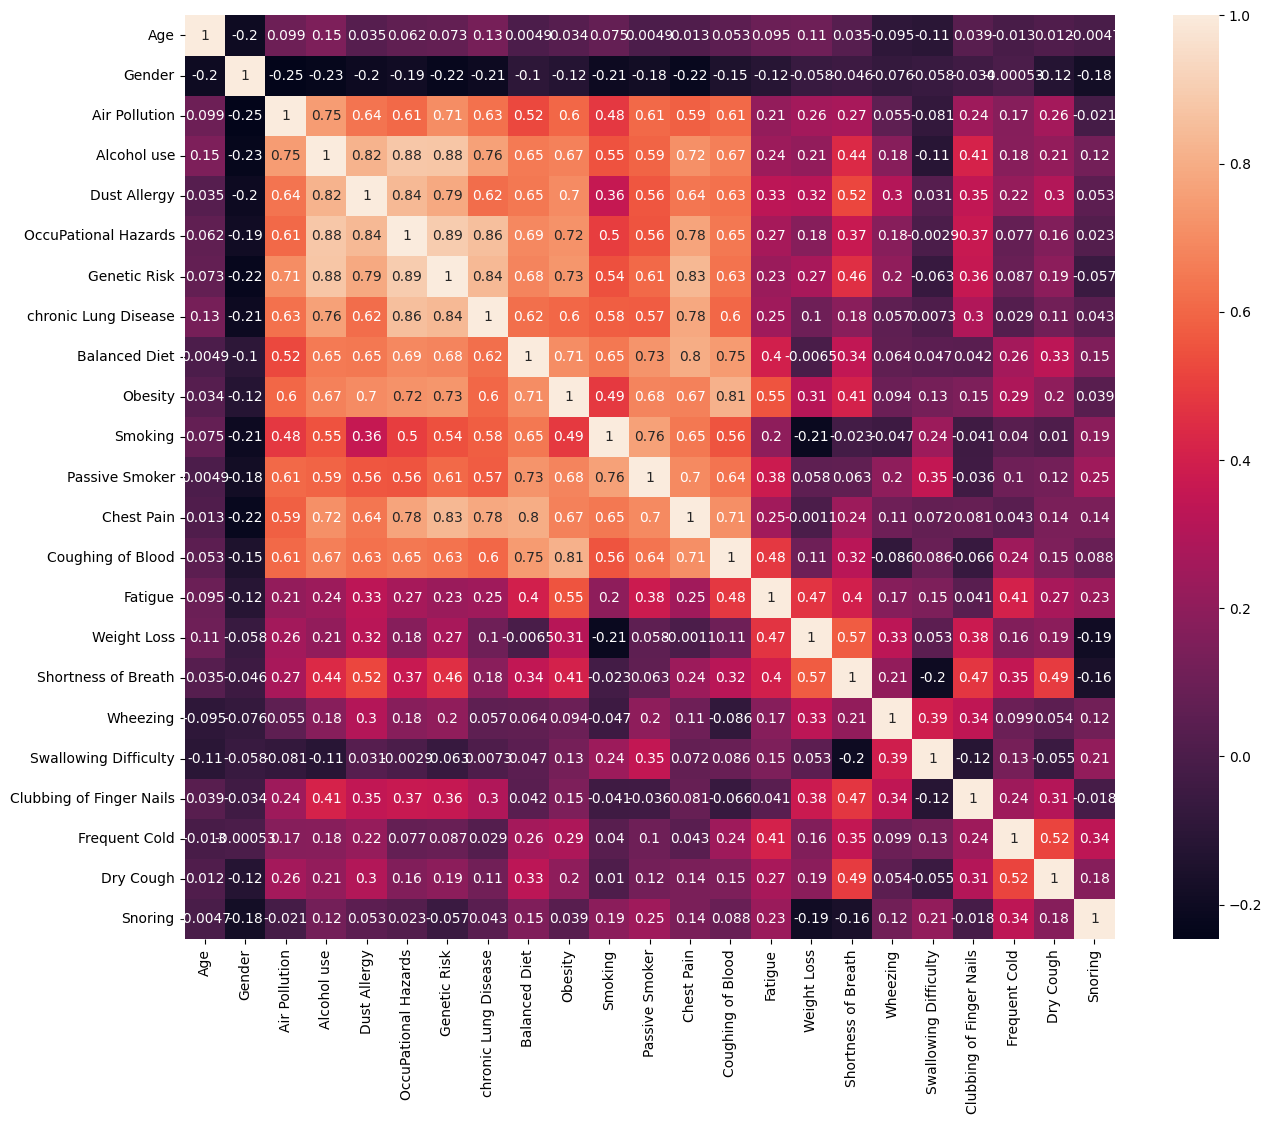

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=xcancer.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
# @title TASK 3 -- Feature Selection
cm=xcancer.corr()
hc=set()
for i in range(len(cm.columns)):
    for j in range(i):
        if abs(cm.iloc[i, j]) > 0.5:
            col = cm.columns[i]
            hc.add(col)
xcancer.drop(columns=hc,inplace=True)

In [ ]:
xcancer

,Age,Gender,Air Pollution,Weight Loss,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Snoring
0,33,1,2,4,2,3,1,2,4
1,17,1,3,3,8,6,2,1,2
2,35,1,4,7,2,1,4,6,2
3,37,1,7,2,1,4,5,6,5
4,46,1,6,2,1,4,2,4,3
...,...,...,...,...,...,...,...,...,...
995,44,1,6,3,7,8,2,4,3
996,37,2,6,6,7,2,4,3,4
997,25,2,4,7,2,1,4,6,2
998,18,2,6,2,1,4,2,4,3


In [ ]:
# @title TASK 3 -- Splitting into Train and Test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xcancer,ycancer,test_size=0.2,random_state=42)

In [ ]:
# @title TASK 3 -- Scaling Data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)
xtrain=pd.DataFrame(xtrain)
xtest=pd.DataFrame(xtest)

Scaling is necessary because age ranges from 1 to 100 approx

In [ ]:
# @title TASK 3 -- Splitting Validation Data into Train and Test
xtrainval,xtestval,ytrainval,ytestval=train_test_split(xtrain,ytrain,test_size=0.3,random_state=0)

A validation set helps tune the model. It also does prevent overfitting and gives a realistic estimate of the model’s performance.

In [ ]:
# @title TASK 3 -- Applying KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
acc=accuracy_score(ytest,ypred)
print("Testing Accuracy: ",acc)
knn.fit(xtrainval,ytrainval)
ypredval=knn.predict(xtrainval)
accval=accuracy_score(ytrainval,ypredval)
print("Training Accuracy: ",accval)


Testing Accuracy:  0.995
Training Accuracy:  0.9982142857142857


In [ ]:
# @title TASK 3 -- Comparing Accuracies using Different Metrics
metrics=['euclidean','manhattan','chebyshev']
for i in metrics:
    print("Metric:",i)
    knn=KNeighborsClassifier(n_neighbors=7,metric=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    acc=accuracy_score(ytest,ypred)
    print("Testing Accuracy: ",acc)
    knn.fit(xtrainval,ytrainval)
    ypredval=knn.predict(xtrainval)
    accval=accuracy_score(ytrainval,ypredval)
    print("Training Accuracy: ",accval)
    print("------------------------------------------")

Metric: euclidean
Testing Accuracy:  0.995
Training Accuracy:  0.9982142857142857
------------------------------------------
Metric: manhattan
Testing Accuracy:  1.0
Training Accuracy:  1.0
------------------------------------------
Metric: chebyshev
Testing Accuracy:  0.995
Training Accuracy:  0.9785714285714285
------------------------------------------


Different distance metrics in KNN can significantly influence model performance and accuracy. In this case manhattan gives best results.

# **TASK 5**

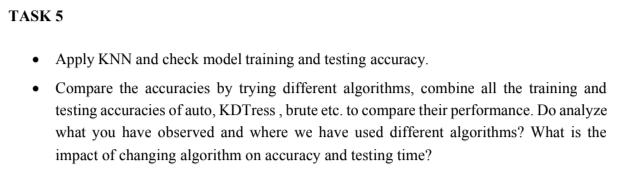

In [ ]:
# @title TASK 5 -- KNN Using Different Algorithms
import time
algorithms=['auto', 'ball_tree', 'kd_tree', 'brute']
for i in algorithms:
    print("Algorithm:",i)
    knn = KNeighborsClassifier(n_neighbors=7,algorithm=i)
    t1=time.time()
    knn.fit(xtrain, ytrain)
    t2=time.time()
    trtime=t2-t1
    ypred =knn.predict(xtest)
    acc=accuracy_score(ytest,ypred)
    t3=time.time()
    knn.fit(xtrainval,ytrainval)
    t4=time.time()
    vltime=t4-t3
    ypredval=knn.predict(xtrainval)
    accval=accuracy_score(ytrainval,ypredval)
    print("Testing Accuracy:",acc)
    print("Training Accuracy:",accval)
    print("Testing Time:",trtime,"s")
    print("Training Time:",vltime,"s")
    print("------------------------------------------")

Algorithm: auto
Testing Accuracy: 0.995
Training Accuracy: 0.9982142857142857
Testing Time: 0.004080295562744141 s
Training Time: 0.003693103790283203 s
------------------------------------------
Algorithm: ball_tree
Testing Accuracy: 0.995
Training Accuracy: 0.9982142857142857
Testing Time: 0.0034170150756835938 s
Training Time: 0.0034246444702148438 s
------------------------------------------
Algorithm: kd_tree
Testing Accuracy: 0.995
Training Accuracy: 0.9982142857142857
Testing Time: 0.0038042068481445312 s
Training Time: 0.0035948753356933594 s
------------------------------------------
Algorithm: brute
Testing Accuracy: 0.995
Training Accuracy: 0.9982142857142857
Testing Time: 0.002739429473876953 s
Training Time: 0.0026705265045166016 s
------------------------------------------


Different algos handle the distance calculations differently, so there maybe slight differences in accuracy. Time also varies between the algorithms as they are optimized for specific types of data distributions, so one algorithm may be faster than the others on a specific dataset. You will have to choose your algorithm based on what type of data you have, you need to choose the algorithm that performs best on your dataset.